
# Wolfcamp Example - Single las file


This example shows the full petrophysical workflow avaiable in PetroPy
for a single wolfcamp las file courtesy of University Lands Texas.

The workflow progresses in these 11 steps

1. Read las file and create a :class:`petropy.Log` object
2. Load tops from a csv file using :meth:`petropy.Log.tops_from_csv`
3. Create a :class:`petropy.LogViewer` show in edit_mode to fix data
4. Define formations for calculations.
5. Calculate fluid properties by
    1. Loading parameters via :meth:`petropy.Log.fluid_properties_parameters_from_csv`
    2. Calculating over formations via :meth:`petropy.Log.formation_fluid_properties`
6. Calculate mulitmineral properties by
    1. Loading parameters via :meth:`petropy.Log.multimineral_parameters_from_csv`
    2. Calculating over formations via :meth:`petropy.Log.formation_multimineral_model`
7. Curve summations via :meth:`petropy.Log.summations`
8. Adding pay flags via :meth:`petropy.Log.add_pay_flag`
9. Clustering intervals into Electrofacies via :meth:`petropy.electrofacies`
10. Exporting log statistics via :meth:`petropy.Log.statistics`
11. Saving LogViewer to png and Log to las

To bulk process a folder of las files at once, use the `bulk example`_ .

Downloading the script at the bottom of this webpage will not download the required las
file or PetroPy logo. To download all files, view the `examples folder`_ on GitHub.




In [1]:
%matplotlib inline
import sys
sys.path.append(r'C:\Users\hooge\GitHub\Geology\PetroPy')
import petropy as ptr

# import pyplot to add logo to figure
import matplotlib.pyplot as plt


In [2]:

### 1. Read las file

# create a Log object by reading a file path  

las_file_path = '../../examples/42303347740000.las'
log = ptr.Log(las_file_path)


In [3]:

### 2. load tops ###

tops_file_path = '../../examples/tops.csv'
log.tops_from_csv(tops_file_path)


AttributeError: 'NoneType' object has no attribute 'add_tool'

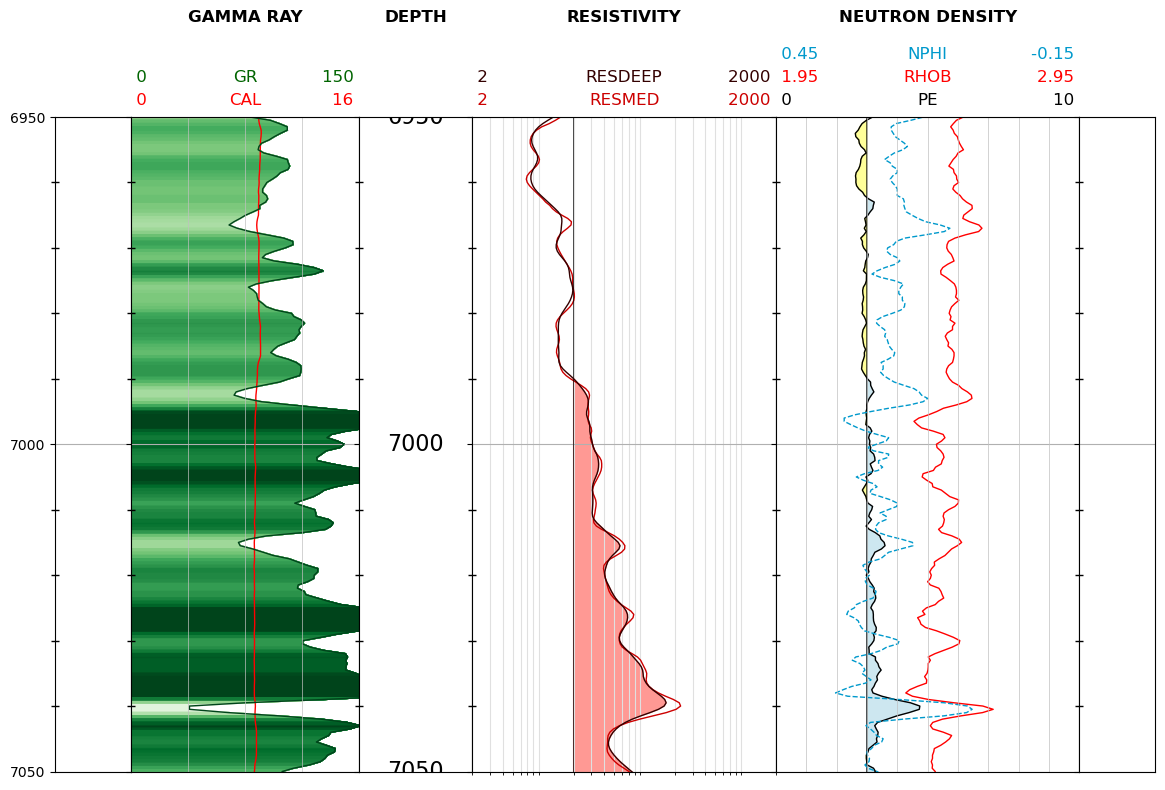

In [4]:

### 3. graphically edit log ###

# use manual mode for fixing borehole washout 
# and other changes requiring redrawing data  

# use bulk shift mode to linearly adjust all curve data                                  

# close both windows to continue program      

viewer = ptr.LogViewer(log, top = 6950, height = 100)
# viewer.show(edit_mode = True)
viewer.show()

# overwrite log variable with updated log from LogViewer edits                        

log = viewer.log


In [ ]:

### 4. define formations ###

f = ['WFMPA', 'WFMPB', 'WFMPC']


In [ ]:

### 5. fluid properties ###

# load fluid properties from a csv file       
# since path is not specified, load default   
# csv file included with petropy              

log.fluid_properties_parameters_from_csv()

# calculate fluid properties over defined     
# formations with parameter WFMP from         
# previously loaded csv                       

log.formation_fluid_properties(f, parameter = 'WFMP')


In [ ]:

### 6. multimineral model ###

# load multimineral parameters from csv file  
# since path is not specified, load default   
# csv file included with petropy              

log.multimineral_parameters_from_csv()

# calculate multiminearl model over defined   
# formations with parameter WFMP from         
# previously loaded csv                       

log.formation_multimineral_model(f, parameter = 'WFMP')


In [ ]:

### 7. summations ###

# define curves to calculate cumulative values 

c = ['OIP', 'BVH', 'PHIE']

# calculate cumulative values over formations  

log.summations(f, curves = c)


In [ ]:

### 8. pay flags ###

# define pay flogs as list of tuples for      
# (curve, value)                              

flag_1_gtoe = [('PHIE', 0.03)]
flag_2_gtoe = [('PAY_FLAG_1', 1), ('BVH', 0.02)]
flag_3_gtoe = [('PAY_FLAG_2', 1)]
flag_3_ltoe = [('SW', 0.2)]

# add pay flags over defined formations       

log.add_pay_flag(f, greater_than_or_equal = flag_1_gtoe)

log.add_pay_flag(f, greater_than_or_equal = flag_2_gtoe)

log.add_pay_flag(f, greater_than_or_equal = flag_3_gtoe,
                less_than_or_equal = flag_3_ltoe)


In [ ]:

### 9. electrofacies ###

# define curves to use in electofaceis module 

electro_logs = ['GR_N', 'RESDEEP_N', 'NPHI_N', 'RHOB_N', 'PE_N']

# make a list of Log objects as input         

logs = [log]

# calculate electrofacies for the defined logs
# over the specified formations               
# finding 6 clusters of electrofacies         
# with RESDEEP_N logarithmically scaled       

logs = ptr.electrofacies(logs, f, electro_logs, 6,
                        log_scale = ['RESDEEP_N'])

# unpack log object from returned list        

log = logs[0]


c:\Users\hooge\miniconda3\envs\geophys312\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [ ]:

### 10. statistics ###

# define list of curves to find statistics    

stats_curves = ['OIP', 'BVH', 'PHIE', 'SW', 'VCLAY', 'TOC']

# calculate stats over specified formation and
# save to csv file wfmp_statistics.csv        
# update the line if the well, formation is   
# already included in the csv file            

log.statistics_to_csv('wfmp_statistics.csv', replace = True,
                    formations = f, curves = stats_curves)


C:\Users\hooge\GitHub\Geology\PetroPy\petropy\log.py:2626: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([prev_df, new_df])


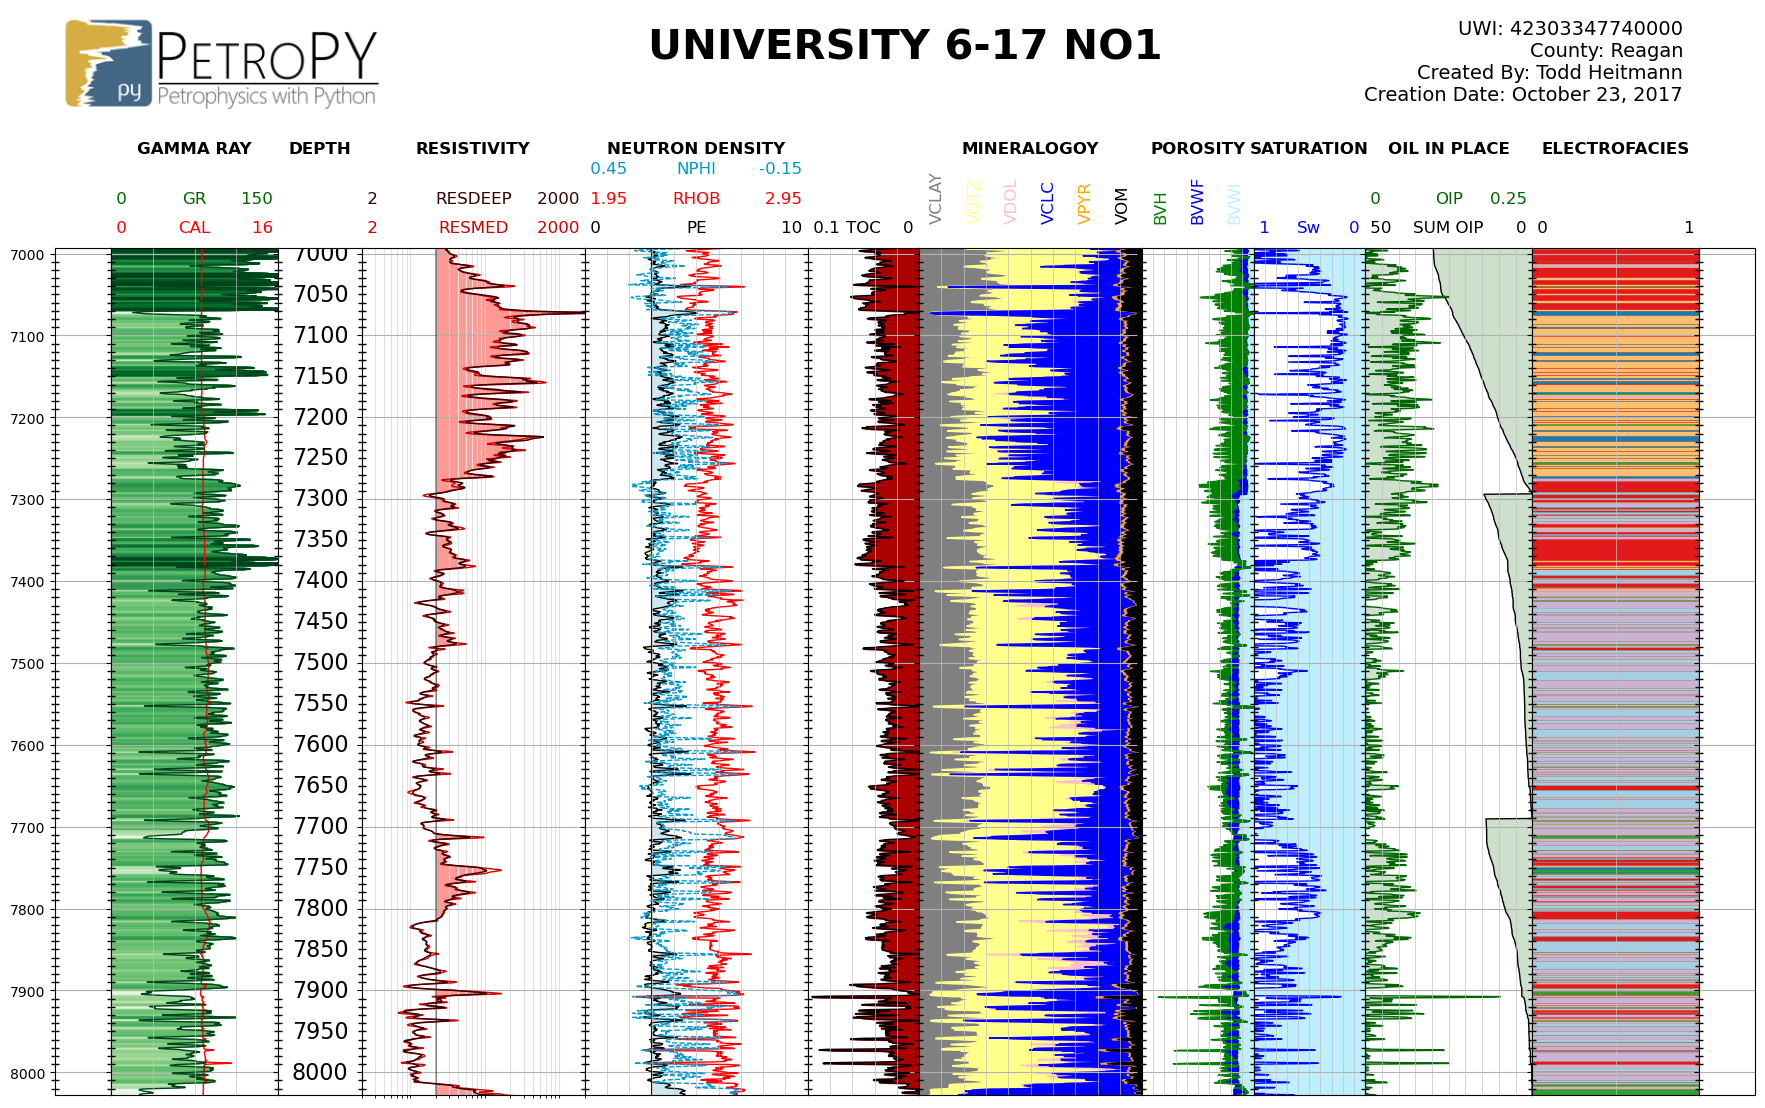

In [ ]:

### 11. export data ###

# find way to name well, looking for well name
# or UWI or API                               

if len(log.well['WELL'].value) > 0:
    well_name = log.well['WELL'].value
elif len(str(log.well['UWI'].value)) > 0:
    well_name = str(log.well['UWI'].value)
elif len(log.well['API'].value) > 0:
    well_name = str(log.well['API'].value)
else:
    well_name = 'UNKNOWN'
well_name = well_name.replace('.', '')

# scale height of viewer to top and bottom    
# of calculated values                        

wfmpa_top = log.tops['WFMPA']
wfmpc_base = log.next_formation_depth('WFMPC')

top = wfmpa_top
height = wfmpc_base - wfmpa_top

# create LogViewer with the default full_oil 
# template included in petropy               

viewer = ptr.LogViewer(log, top = top, height = height,
                        template_defaults = 'full_oil')

# set viewer to 17x11 inches size for use in 
# PowerPoint or printing to larger paper     

viewer.fig.set_size_inches(17, 11)

# add well_name to title of LogViewer        

viewer.fig.suptitle(well_name, fontweight = 'bold', fontsize = 30)

# add logo to top left corner                 

logo_im = plt.imread('../../examples/company_logo.png')
logo_ax = viewer.fig.add_axes([0, 0.85, 0.2, 0.2])
logo_ax.imshow(logo_im)
logo_ax.axis('off')

# add text to top right corner                

if len(str(log.well['UWI'].value)) > 0:
    label = 'UWI: ' + str(log.well['UWI'].value) + '\n'
elif len(log.well['API'].value) > 0:
    label = 'API: ' + str(log.well['API'].value) + '\n'
else:
    label = ''

label += 'County: Reagan\nCreated By: Todd Heitmann\n'
label += 'Creation Date: October 23, 2017'
viewer.axes[0].annotate(label, xy = (0.99,0.99),
                    xycoords = 'figure fraction',
                    horizontalalignment = 'right',
                    verticalalignment = 'top',
                    fontsize = 14)

# save figure and log                         

viewer_file_name = f"{well_name}_processed.png"
las_file_name = f"{well_name}_processed.las"

viewer.fig.savefig(viewer_file_name)
viewer.log.write(las_file_name)